In [1]:
import sys
import os
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

atlas_path = "C:/Users/natha/OneDrive/Desktop/C++/Atlas/x64/Debug"
sys.path.append(atlas_path)


from AtlasPy.core import Hydra, Portfolio, Strategy
from AtlasPy.ast import *

In [2]:
exchange_path = "C:/Users/natha/OneDrive/Desktop/C++/Atlas/AtlasPy/src/exchangeVBT"
strategy_id = "test_strategy"
exchange_id = "test_exchange"
portfolio_id = "test_portfolio"

hydra = Hydra()
intial_cash = 100.0
exchange = hydra.addExchange(exchange_id, exchange_path, "")
portfolio = hydra.addPortfolio(portfolio_id, exchange, intial_cash)
hydra.build()

In [3]:
st = time.perf_counter_ns()
n = 5
close = AssetReadNode.make("Close", 0, exchange)
prev_close = AssetReadNode.make("Close", -1, exchange)
change = AssetOpNode.make(
    close,
    prev_close,
    AssetOpType.SUBTRACT
)

close_max = exchange.registerObserver(MaxObserverNode(change, n))
exchange.enableNodeCache("close_max",close_max, False)

ev = ExchangeViewNode.make(exchange, close)
allocation = AllocationNode.make(
    ev
)
strategy_node_signal = StrategyNode.make(allocation, portfolio)
strategy = hydra.addStrategy(Strategy(strategy_id, strategy_node_signal, 1.0), True)
strategy.enableTracerHistory(TracerType.NLV)
hydra.run()
et = time.perf_counter_ns()
print("Time (ms): ", (et-st)/1e6)

Time (ms):  33.9623


In [4]:
ticker = "BTC-USD"
asset_id = exchange.getAssetIndex(ticker)
path = os.path.join(exchange_path,f"{ticker}.csv")  
df = pd.read_csv(path)
df["Date"] = pd.to_datetime(df["Date"]) 
df = df.set_index("Date")

btc_idx = exchange.getAssetIndex("BTC-USD")
df["change"] = df["Close"].diff()
df["close_max_atlas"] = close_max.cache()[btc_idx].T
st = time.perf_counter_ns()
df["close_max_pd"] = df["Close"].diff().rolling(n).max()
et = time.perf_counter_ns()
print(f"pd time: {(et-st)/1e6} ms")
df.head(15)

pd time: 0.6331 ms


,Open,High,Low,Close,Volume,Dividends,Stock Splits,change,close_max_atlas,close_max_pd
Date,,,,,,,,,,
2018-01-01 00:00:00+00:00,14112.200195,14112.200195,13154.700195,13657.200195,10291200000,0.0,0.0,NaN,0.000000,NaN
2018-01-02 00:00:00+00:00,13625.000000,15444.599609,13163.599609,14982.099609,16846600192,0.0,0.0,1324.899414,1324.899414,NaN
2018-01-03 00:00:00+00:00,14978.200195,15572.799805,14844.500000,15201.000000,16871900160,0.0,0.0,218.900391,1324.899414,NaN
2018-01-04 00:00:00+00:00,15270.700195,15739.700195,14522.200195,15599.200195,21783199744,0.0,0.0,398.200195,1324.899414,NaN
2018-01-05 00:00:00+00:00,15477.200195,17705.199219,15202.799805,17429.500000,23840899072,0.0,0.0,1830.299805,1830.299805,NaN
2018-01-06 00:00:00+00:00,17462.099609,17712.400391,16764.599609,17527.000000,18314600448,0.0,0.0,97.500000,1830.299805,1830.299805
2018-01-07 00:00:00+00:00,17527.300781,17579.599609,16087.700195,16477.599609,15866000384,0.0,0.0,-1049.400391,1830.299805,1830.299805
2018-01-08 00:00:00+00:00,16476.199219,16537.900391,14208.200195,15170.099609,18413899776,0.0,0.0,-1307.500000,1830.299805,1830.299805
2018-01-09 00:00:00+00:00,15123.700195,15497.500000,14424.000000,14595.400391,16659999744,0.0,0.0,-574.699219,1830.299805,1830.299805


In [5]:
df_diff = df[(df["close_max_atlas"] != df["close_max_pd"])]
df_diff = df_diff.iloc[n:]
df_diff

,Open,High,Low,Close,Volume,Dividends,Stock Splits,change,close_max_atlas,close_max_pd
Date,,,,,,,,,,


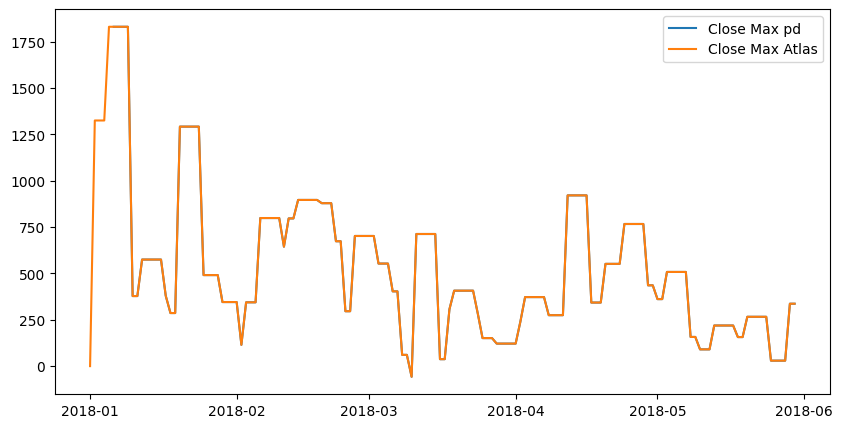

In [6]:
n = 150
df_sub = df.iloc[0:n]
fig= plt.figure(figsize=(10,5))
plt.plot(df_sub.index,df_sub["close_max_pd"], label="Close Max pd")
plt.plot(df_sub.index,df_sub["close_max_atlas"], label="Close Max Atlas")
plt.legend()